## Prep Data

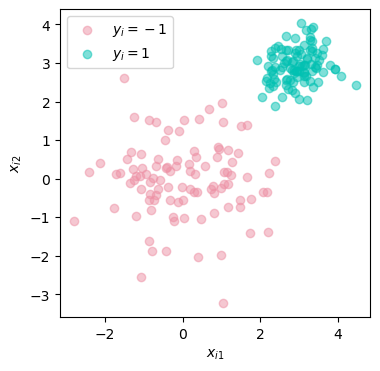

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from hidden.perceptron import perceptron_update, draw_line

np.random.seed(123)

plt.rcParams["figure.figsize"] = (4, 4)

X1 = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

X3 = np.random.normal(0, 1, 100)*.5+3
X4 = np.random.normal(0, 1, 100)*.5+3

fig, ax = plt.subplots(1, 1)

def plot_scatter(X1, X2, X3, X4, ax, legend = True):
    
    s = ax.scatter(X1, X2, color = "#ED90A4", alpha = 0.5, label = r"$y_i = -1$")
    s = ax.scatter(X3, X4, color = "#00C1B2", alpha = 0.5, label = r"$y_i = 1$")
    l = ax.set(xlabel = r"$x_{i1}$")
    l = ax.set(ylabel = "$x_{i2}$")
    if legend:
        l = ax.legend()
    
plot_scatter(X1, X2, X3, X4, ax)

X = np.append(np.column_stack((X1, X2)), np.column_stack((X3, X4)), axis = 0) # feature matrix
y = 2*(np.arange(0, 200) >= 100) - 1 # target vector

In [2]:
X[:5,:], y[:5]

(array([[-1.0856306 ,  0.64205469],
        [ 0.99734545, -1.97788793],
        [ 0.2829785 ,  0.71226464],
        [-1.50629471,  2.59830393],
        [-0.57860025, -0.02462598]]),
 array([-1, -1, -1, -1, -1]))

### Perceptron Algorithm

In [3]:
w = np.random.rand(3)
w

array([8.18876137e-05, 9.80597342e-01, 8.82712985e-01])

In [12]:

w = np.random.rand(3)
loss = 1 # 1 - accuracy

while loss != 0:
    w, i, loss = perceptron_update(X, y, w)
    print(f"Current weight = {w}, current loss = {loss}" )

Current weight = [ 5.1229715  -7.09197354 -2.31015032], current loss = 0.69
Current weight = [ 8.15736566 -4.12317281 -1.31015032], current loss = 0.23
Current weight = [ 5.37497837 -6.40602099 -4.31015032], current loss = 0.65
Current weight = [ 7.91732483 -3.03071603 -3.31015032], current loss = 0.19
Current weight = [ 3.43039242 -7.16248848 -6.31015032], current loss = 0.6
Current weight = [ 6.48804178 -3.13425481 -5.31015032], current loss = 0.175
Current weight = [ 3.03742515 -3.6658318  -8.31015032], current loss = 0.525
Current weight = [ -2.19371152   0.56983483 -11.31015032], current loss = 0.5
Current weight = [  0.70911712   3.84045048 -10.31015032], current loss = 0.025
Current weight = [ 2.74725925  5.9535648  -9.31015032], current loss = 0.035
Current weight = [ -0.26490244   0.07533077 -12.31015032], current loss = 0.5
Current weight = [  2.94518736   3.17879453 -11.31015032], current loss = 0.0


### Perceptron Algorithm (with visualization)

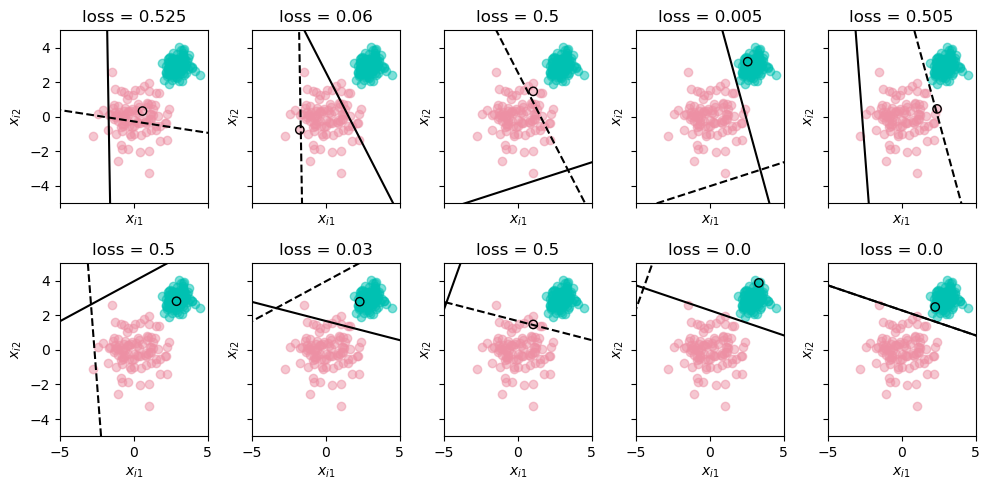

In [7]:
np.random.seed(123456)
w = np.random.rand(3)

X = np.append(np.column_stack((X1, X2)), np.column_stack((X3, X4)), axis = 0) # feature matrix
y = 2*(np.arange(0, 200) >= 100) - 1 # target vector

plt.rcParams["figure.figsize"] = (10, 5)
fig, axarr = plt.subplots(2, 5, sharex = True, sharey = True)
for ax in axarr.ravel():
    ax.set(xlim = (-5, 5), ylim = (-5, 5))
    plot_scatter(X1, X2, X3, X4, ax, legend = False)
    draw_line(w, -10, 10, ax, color = "black", linestyle = "dashed")
    w, i, loss = perceptron_update(X, y, w)    
    ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black")
    draw_line(w, -10, 10, ax, color = "black")
    ax.set_title(f"loss = {loss}")
    
plt.tight_layout()